In [1]:
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D import PATH
import os
from PDE2D.utils.sketch import *
root_directory = os.path.join(PATH, "output2D", "optimizations", "variable-eit")
from PDE2D.BoundaryShape import *
from PDE2D.Coefficient import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
import matplotlib.ticker as ticker
from PDE2D.Solver import *

In [2]:
def disable_ticks_y(ax):
    """Disable ticks around plot (useful for displaying images)"""
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])

In [3]:
DEFAULT_FONTSIZE = 5.3  # Font size used by captions in ACM format
DEFAULT_FONTSIZE_SMALL = 4.9

MPL_STYLE = {
    "text.usetex": True,
    "text.color": 'black',
    "font.size": DEFAULT_FONTSIZE,
    "axes.titlesize": DEFAULT_FONTSIZE,
    "axes.labelsize": DEFAULT_FONTSIZE_SMALL,
    "xtick.labelsize": DEFAULT_FONTSIZE_SMALL,
    "ytick.labelsize": DEFAULT_FONTSIZE_SMALL,
    "legend.fontsize": DEFAULT_FONTSIZE_SMALL,
    "figure.titlesize": DEFAULT_FONTSIZE,
    "text.latex.preamble": r"""\usepackage{libertine}
                               \usepackage[libertine]{newtxmath}
                               \usepackage{amsmath}
                               \usepackage{amsfonts}
                               \usepackage{bm}
                               \usepackage{bbm}""",
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'axes.edgecolor':'black',
    'axes.linewidth': 0.4,
    'xtick.major.size': 0.5,
    'xtick.major.width': 0.5,
    'xtick.minor.size': 0.25,
    'xtick.minor.width': 0.5,

    'ytick.major.size': 0.5,
    'ytick.major.width': 0.5,
    'ytick.minor.size': 0.25,
    'ytick.minor.width': 0.5,

    'lines.linewidth': 0.75,
    'patch.linewidth': 0.5,

    'grid.linewidth': 0.5,
}
matplotlib.rcParams.update(MPL_STYLE)

In [4]:
resolution = [512, 512]

cmap_tensor = "inferno"
cmap_boundary = "coolwarm"
cmap_primal_obj = "viridis"
cmap_primal_diff = "coolwarm"
linewidth = 1
dirichlet_size = 0.7
e_size = 3.2
radius = 0.22
bbox=   [[-1.1 * radius,-1.1 * radius], [1.1 * radius, 1.1 * radius]]
num_electrodes = 16
is_delta = True
colors = ["darkorange", "green"]


In [5]:
spe = 17
spe_primal = 20
spe_dirichlet = 23
seed = 42
normalize = "unnormalized"
L1 = 0.0001
TV = 0.0001

In [7]:
conf = 1
scale=1.0
merge = 0.3
dirichlet_num = 3
restensor = 16
folder0 = f"conf{conf}-scale{scale}"
folder1 = "skip1-skip3-skip5-skip7"
folder2 = f"maxdirichlet{dirichlet_num}-merge{merge}-spe{spe_dirichlet}"
folder3 = f"res{restensor}-spe{spe_primal}_{spe}-seed{seed}-{normalize}"
folder4 = f"L1{L1}-TV{TV}-kill150_0.99"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3, folder4, "record.npy")
record1 = np.load(recordpath, allow_pickle = True).item()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ekrem/repos/MC-PDE3D/output2D/optimizations/variable-eit/conf1-scale1.0/skip1-skip3-skip5-skip7/maxdirichlet3-merge0.3-spe23/res16-spe20_17-seed42-unnormalized/L10.0001-TV0.0001-kill150_0.99/record.npy'

In [7]:
conf = 4
scale=1.0
merge = 0.30
dirichlet_num = 3
restensor = 16
folder0 = f"conf{conf}-scale{scale}"
folder1 = "skip1-skip3-skip5-skip7"
folder2 = f"maxdirichlet{dirichlet_num}-merge{merge}-spe{spe_dirichlet}"
folder3 = f"res{restensor}-spe{spe_primal}_{spe}-seed{seed}-{normalize}"
folder4 = f"L1{L1}-TV{TV}-kill150_0.99"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3, folder4, "record.npy")
record2 = np.load(recordpath, allow_pickle = True).item()

In [8]:
conf = 5
scale=1.0
merge = 0.30
dirichlet_num = 3
restensor = 16
folder0 = f"conf{conf}-scale{scale}"
folder1 = "skip1-skip3-skip5-skip7"
folder2 = f"maxdirichlet{dirichlet_num}-merge{merge}-spe{spe_dirichlet}"
folder3 = f"res{restensor}-spe{spe_primal}_{spe}-seed{seed}-{normalize}"
folder4 = f"L1{L1}-TV{TV}-kill150_0.99"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3, folder4, "record.npy")
record3 = np.load(recordpath, allow_pickle = True).item()

In [9]:
conf = 6
scale=1.0
merge = 0.30
dirichlet_num = 3
restensor = 24
folder0 = f"conf{conf}-scale{scale}"
folder1 = "skip1-skip3-skip5-skip7"
folder2 = f"maxdirichlet{dirichlet_num}-merge{merge}-spe{spe_dirichlet}"
folder3 = f"res{restensor}-spe{spe_primal}_{spe}-seed{seed}-{normalize}"
folder4 = f"L1{L1}-TV{TV}-kill150_0.99"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3, folder4, "record.npy")
record4 = np.load(recordpath, allow_pickle = True).item()

In [10]:
conf = 8
scale=1.0
merge = 0.30
dirichlet_num = 3
restensor = 24
folder0 = f"conf{conf}-scale{scale}"
folder1 = "skip1-skip3-skip5-skip7"
folder2 = f"maxdirichlet{dirichlet_num}-merge{merge}-spe{spe_dirichlet}"
folder3 = f"res{restensor}-spe{spe_primal}_{spe}-seed{seed}-{normalize}"
folder4 = f"L1{L1}-TV{TV}-kill150_0.99"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3, folder4, "record.npy")
record5 = np.load(recordpath, allow_pickle = True).item()

In [11]:
def visualize_primal(image_, ax, input_range = [None, None], verbose_x = False, verbose_y = False):
    my_cmap = matplotlib.colormaps['coolwarm']
    my_cmap.set_bad('black')
    image = np.array(image_)
    image[image==0] = np.nan
    image = np.repeat(np.repeat(image, 4, axis = 0), 4, axis = 1)
    im = ax.imshow(image, cmap = my_cmap, vmin = input_range[0], 
                   vmax=input_range[1])
    #ax.set_xlabel("Electrodes")
    #ax.set_ylabel("Confs.")
    locs = np.arange(4) * 16 + 1.5
    labels = [f"{4 * i}" for i in range(4)]
    ax.set_xticks(locs)
    if verbose_x:
        ax.set_xticklabels(labels)
        #ax.set_xlabel("Electrode nums.")
    else:
        #ax.set_xticks([])
        ax.set_xticklabels([])
    ax.set_yticks(locs)

    if verbose_y:
        ax.set_yticklabels(labels)
    else:
        ax.set_yticklabels([])

    disable_ticks_y(ax)
    return im

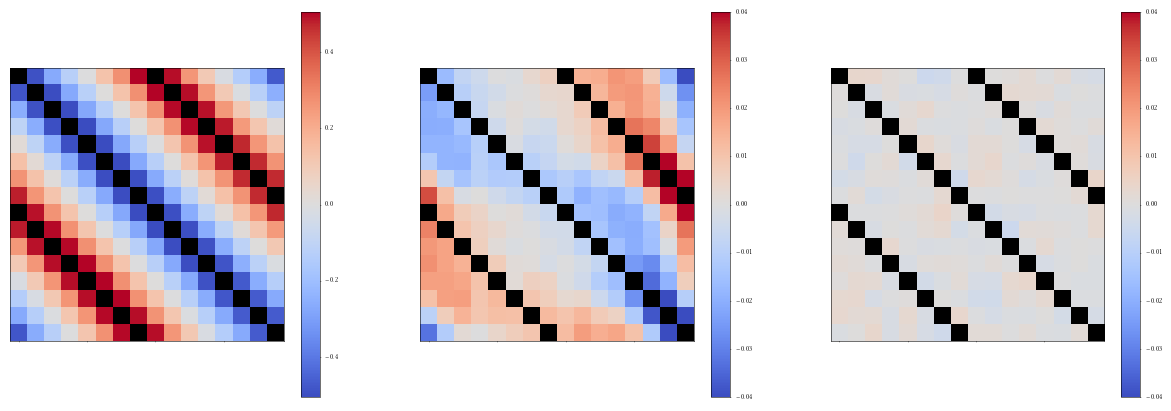

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
im1 = visualize_primal(record1["objectives"][-16:], ax1)
plt.colorbar(im1)
im2 = visualize_primal(record1["primals-1"][-16:] - record1["objectives"][-16:], ax2, input_range = [-0.04, 0.04])
plt.colorbar(im2)
im3 = visualize_primal(record1["primals-512"][-16:] - record1["objectives"][-16:], ax3, input_range = [-0.04, 0.04])
plt.colorbar(im3)

In [13]:
boundary = CircleWithElectrodes(radius = radius, num_electrodes=num_electrodes, is_delta = is_delta, 
                                    injection_set = 'skip1-skip3-skip5-skip7', centered = True)


In [14]:
def visualize_tensor(ax, shape, image, bbox, resolution, dirichlet_points, colorbar = False, cmap = "viridis", input_range = [0, 3.2], lw = linewidth, scatter = True):
    bbox_ =   [[-1.05 * radius,-1.05 * radius], [1.05 * radius, 1.05 * radius]]
    grad_zero_points, _, _ = shape.create_boundary_points(spp = 2, res = 64, distance = 0.0)
    coeff = TextureCoefficient(name = "coeff", bbox = bbox_, tensor_np = image, grad_zero_points=grad_zero_points, out_val = 1)
    points = create_image_points(bbox, resolution, spp = 4)
    vals = coeff.get_value(points)
    inside_mask = shape.inside_closed_surface_mask(points)
    bi = shape.boundary_interaction(points)
    vals = dr.select(inside_mask | (bi.d < 1e-3), vals, dr.nan)
    image, tensor = create_image_from_result(vals, resolution)
    im = plot_image(image[0], ax, colorbar = colorbar, input_range = input_range, cmap = cmap)
    shape.sketch(ax, bbox, resolution, lw = lw, e_size = e_size, colors = colors)
    if dirichlet_points is None:
        data_holder = DataHolder(shape = shape, α = coeff)
        dirichlet_points =  data_holder.compute_high_conductance_points(max_num_points=1, cond_threshold=1.2, 
                                                                    grad_threshold=10, merge_distance=0.35)
    dirichlet_s = point2sketch(Array2f(dirichlet_points.T), bbox, resolution).numpy()
    if scatter:
        ax.scatter(dirichlet_s[0], dirichlet_s[1], s = dirichlet_size, color = "darkcyan")
    disable_border(ax)
    return im


In [15]:
dirichlet_points= record1["dirichletpoints-12"]
print(dirichlet_points)

[[-0.07038799  0.06779799]]


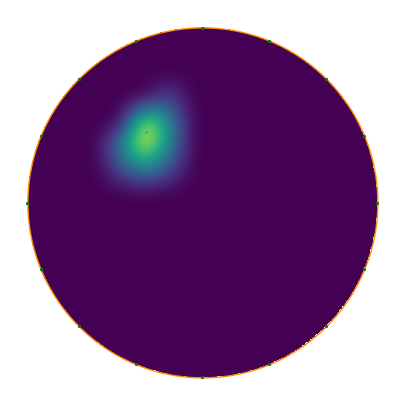

In [16]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
image = record1["objective-tensor"]
dirichlet = record1["dirichlet-objective"]
visualize_tensor(ax, boundary, image, bbox, resolution, dirichlet, colorbar = False, cmap = "viridis", input_range = [1, 3])

In [17]:

def vis_single_opt(fig, ax, shape, record, iters, cbar_offset, pre_cbar_offset, post_cbar_offset, pre_image_offset, image_shrink, cbar_begin, cbar_end, imsize,   num_ticks = 3, 
                   verbose = False, verbose_last =False,  tensor_range = [None, None], cmap_tensor = "Reds"):
    total_cbar_offset = cbar_offset + pre_cbar_offset + post_cbar_offset
    num_iter = len(iters)
    num_images = num_iter + 4
    g = gridspec.GridSpecFromSubplotSpec(imsize, imsize * num_images + total_cbar_offset * 3 + 1 * pre_image_offset, ax, wspace = 0.0, hspace=0.0)
    title_pad = 3
    title_pad2 = 2
    for i, iter in enumerate(iters):
        ax = fig.add_subplot(g[0 : imsize, i * imsize : (i+1) * imsize])
        image = record[f"diffusion.texture.tensor-{iter}"]
        dirichlet_points = record[f"dirichletpoints-{iter}"]
        im = visualize_tensor(ax, shape, image, bbox, resolution, dirichlet_points, colorbar = False, cmap = cmap_tensor, input_range = tensor_range)
        if verbose:
            text = f"(a{i+1})"
            t = r"$\textbf{" + text + "}$"
            ax.set_title(f"{t} Iter. {iter}", pad = title_pad)

    ax_obj = fig.add_subplot(g[0 : imsize, num_iter * imsize : (num_iter + 1) * imsize])
    image_obj = record[f"objective-tensor"]
    dirichlet_points = record[f"dirichlet-objective"]
    im = visualize_tensor(ax_obj, shape, image_obj, bbox, resolution, dirichlet_points, colorbar = False, cmap = cmap_tensor, input_range = tensor_range, scatter = False)
    ax_cbar_opt = fig.add_subplot(g[cbar_begin : imsize- cbar_end, (num_iter + 1) * imsize + pre_cbar_offset : 
                                                ((num_iter + 1) * imsize + pre_cbar_offset + cbar_offset)])
    if verbose:
        ax_obj.set_title(r"$\textbf{(b)}$ Reference", pad = title_pad)
    
    cbar_tensor = plt.colorbar(im, cax = ax_cbar_opt)
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_tensor.locator = tick_locator
    cbar_tensor.formatter.set_powerlimits((0, 0))
    #cbar_tensor.ax.yaxis.set_offset_position('left') 
    cbar_tensor.update_ticks()

    offset = (num_iter + 1) * imsize + total_cbar_offset + pre_image_offset

    primal_objective = record["objectives"][-16:]
    primal_begin = record["primals-1"][-16:] - primal_objective
    primal_end = record[f"primals-512"][-16:] - primal_objective

    
    ax_primal_objective = fig.add_subplot(g[image_shrink : imsize-image_shrink, offset + image_shrink : offset + imsize - image_shrink])
    im_primal_objective = visualize_primal(primal_objective, ax_primal_objective, input_range = [None, None], verbose_x = verbose_last, verbose_y = True)
    if verbose:
        ax_primal_objective.set_title(r"$\textbf{(c)}$ $u_{\mathrm{ref}}$", pad = title_pad + title_pad2)
    
    offset += imsize
    ax_cbar_primal_obj = fig.add_subplot(g[cbar_begin : imsize-cbar_end, pre_cbar_offset + offset : 
                                                    pre_cbar_offset + offset + cbar_offset])
    cbar_primal_obj = plt.colorbar(im_primal_objective, cax = ax_cbar_primal_obj)
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_primal_obj.locator = tick_locator
    cbar_primal_obj.formatter.set_powerlimits((0, 0))
    cbar_primal_obj.ax.yaxis.set_offset_position('left') 
    cbar_primal_obj.update_ticks()
    offset += total_cbar_offset #+ pre_image_offset

    maxdiff = max(np.max(primal_begin), np.max(primal_end))
    mindiff = min(np.min(primal_begin), np.min(primal_end))
    max_range = max(maxdiff, -mindiff)
    input_range_diff = [-max_range, max_range]
    
    ax_primal_begin = fig.add_subplot(g[image_shrink : imsize - image_shrink, offset + image_shrink : offset + imsize - image_shrink])
    im_primal_begin = visualize_primal(primal_begin, ax_primal_begin, input_range = input_range_diff, verbose_x = verbose_last, verbose_y = False)
    if verbose:
        ax_primal_begin.set_title(r"$\textbf{(d1)}$ $u_0 - u_{\mathrm{ref}}$", pad = title_pad + title_pad2)
    offset += imsize #+ pre_image_offset

    ax_primal_end = fig.add_subplot(g[image_shrink : imsize - image_shrink, offset + image_shrink : offset + imsize - image_shrink])
    im_primal_end = visualize_primal(primal_end, ax_primal_end, input_range = input_range_diff, verbose_x = verbose_last, verbose_y = False)
    if verbose:
        ax_primal_end.set_title(r"$\textbf{(d2)}$ $u_{\mathrm{last}} - u_{\mathrm{ref}}$", pad = title_pad + title_pad2)
    offset += imsize #+ pre_image_offset

    ax_cbar_primal = fig.add_subplot(g[cbar_begin : imsize-cbar_end, pre_cbar_offset + offset : 
                                                    pre_cbar_offset + offset + cbar_offset])
    cbar_primal = plt.colorbar(im_primal_begin, cax = ax_cbar_primal)
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_primal.locator = tick_locator
    cbar_primal.formatter.set_powerlimits((0, 0))
    cbar_primal.ax.yaxis.set_offset_position('left') 
    cbar_primal.update_ticks()


In [18]:
records = [record1, record2, record3, record4, record5]

GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumTB as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


'/home/ekrem/repos/MCPDE-2D/figures/opt_eit_variable/opt_eit_variable.pdf'

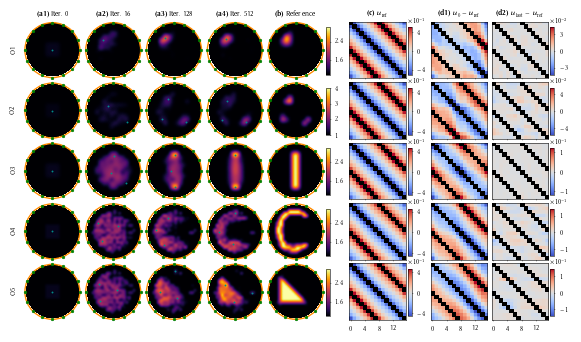

In [19]:
from PDE2D.utils.common import *
cbar_offset = 2
pre_cbar_offset = 0
post_cbar_offset = 9
total_cbar_offset = cbar_offset + pre_cbar_offset + post_cbar_offset
cbar_begin = 4
cbar_end = 3
imsize = 32
iters = [0, 16, 128, 512]
num_images = len(iters) + 4
pre_image_offset = 0
image_shrink = 1
scale =(num_images * imsize + 3 * total_cbar_offset + 1 * pre_image_offset) / TEXT_WIDTH
num_opt = len(records)
fig = plt.figure(figsize = ((num_images * imsize + 3 * total_cbar_offset + 1 * pre_image_offset) / scale, num_opt * imsize / scale))


g = gridspec.GridSpec(num_opt, 1, figure = fig, wspace =0, hspace=0)
for i, record in enumerate(records):
    ax = fig.add_subplot(g[i])
    ax.set_ylabel(f"O{i + 1}")
    disable_border(ax)
    disable_ticks(ax)
    verbose = (i ==0)
    verbose_last = i == len(records)-1
    tensor_obj = record["objective-tensor"]
    tensor_range = [tensor_obj.min(), tensor_obj.max()]
    vis_single_opt(fig, ax, boundary, record, iters, cbar_offset, pre_cbar_offset, post_cbar_offset, pre_image_offset, image_shrink, cbar_begin, cbar_end, imsize,  num_ticks = 3, 
                   verbose = verbose, verbose_last = verbose_last, tensor_range = tensor_range, cmap_tensor = cmap_tensor) 
save_fig("opt_eit_variable", os.path.join(PATH, "figures"))
#plt.savefig(f"opt_eit_variable.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)